In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Questão 2

In [47]:
def ode_passo_unico(t0, tf, n, f, PHI, y0):
    y = np.zeros(n+1)
    y[0] = y0
    delta = (tf - t0) / n
    t = 0
    ts =[]
    ts.append(t)
    for k in range(0, n):
        y[k+1] = y[k] + delta * PHI(t, y[k], delta, f)
        t = t + delta
        ts.append(t)
        
    return ts,y

In [15]:
def phi_euler(tk, yk, delta, f):
    return f(tk, yk)

In [5]:
def f2(tk, yk):
    return -100*yk 

In [6]:
def x(t):
    return math.exp(-100*t)

Vamos visualizar o gráfico da solução exata: 

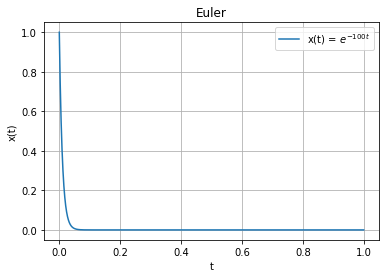

In [7]:
plt.figure()

ts = np.arange(0,1, 0.001)
xs = []
for t in ts:
    xs.append(x(t))
    
plt.plot(ts, xs, label = 'x(t) = $e^{-100t}$')
plt.title('Euler')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.grid(True)
plt.legend()
plt.show()

Agora, vamos aproximar a solução de $\dot{x}(t) = -100x(t)$, com $x(0) = 1$, que tem solução exata $x(t) = e^{-100t}$, utilizando o método de Euler Explícito, com $\Delta t = 0.1/2^{m}, m = 0, 1, 2, 3, 4, 5$, com $t \in [0,1]$. Como nossa função calcula $\Delta t$ a partir de $t_{0}, t_{f}$ e $n$, podemos converter os valores de modo a expressar os valores de $\Delta t$ em função desses parâmetros. Temos: $\Delta t = \dfrac{0.1}{2^m} = \dfrac{t_{f} - t{0}}{n} = \dfrac{1 - 0}{n}$, dado que estamos aproximando a EDO no intervalo $[0,1]$. Daí: $\dfrac{0.1}{2^m} = \dfrac{1}{10\cdot2^{m}} = \dfrac{1}{n} \Rightarrow n = 10\cdot2^{m}$. Pelos valores de $m$ propostos no exercício, temos os valores correspondentes de $n$: 

$n = 10, 20, 40, 80, 160, 320$.

Abaixo, vamos analisar os gráficos das aproximações para os valores de $n$ descritos acima.

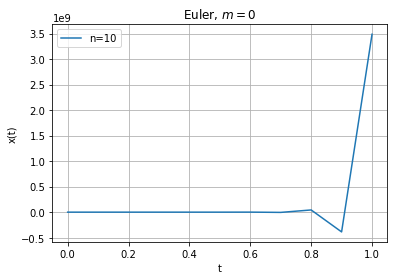

In [52]:
T, X_ = ode_passo_unico(0.0, 1.0, 10, f2, phi_euler, 1.0)

plt.figure()
plt.plot(T, X_, label = 'n=10')

plt.title('Euler, $m = 0 $')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.grid(True)
plt.legend()
plt.show()

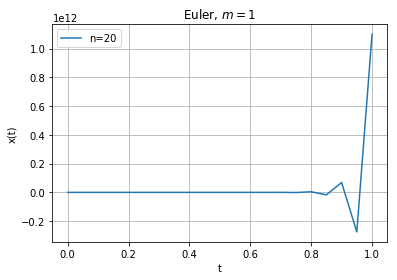

In [53]:
T, X_ = ode_passo_unico(0.0, 1.0, 20, f2, phi_euler, 1.0)

plt.figure()
plt.plot(T, X_, label = 'n=20')

plt.title('Euler, $m = 1$')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.grid(True)
plt.legend()
plt.show()

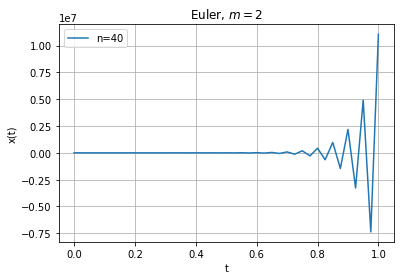

In [54]:
T, X_ = ode_passo_unico(0.0, 1.0, 40, f2, phi_euler, 1.0)

plt.figure()
plt.plot(T, X_, label = 'n=40')

plt.title('Euler, $m = 2$')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.grid(True)
plt.legend()
plt.show()

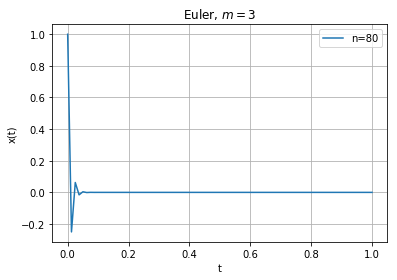

In [55]:
T, X_ = ode_passo_unico(0.0, 1.0, 80, f2, phi_euler, 1.0)

plt.figure()
plt.plot(T, X_, label = 'n=80')

plt.title('Euler, $m = 3$')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.grid(True)
plt.legend()
plt.show()

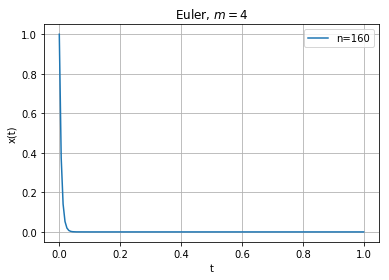

In [56]:
T, X_ = ode_passo_unico(0.0, 1.0, 160, f2, phi_euler, 1.0)

plt.figure()
plt.plot(T, X_, label = 'n=160')

plt.title('Euler, $m = 4$')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.grid(True)
plt.legend()
plt.show()

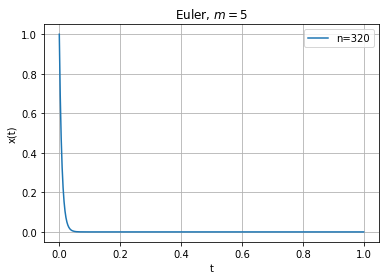

In [57]:
T, X_ = ode_passo_unico(0.0, 1.0, 320, f2, phi_euler, 1.0)

plt.figure()
plt.plot(T, X_, label = 'n=320')

plt.title('Euler, $m = 5$')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.grid(True)
plt.legend()
plt.show()

Notamos que, conforme $m$ cresce, o gráfico da proximação se aproxima do gráfico da solução exata. Os valores de $m = 0, 1$ e $2$ apresentam forte instabilidade, pois, como veremos, os valores correspondentes de $\Delta t$ não estão no intervalo estável.

O método de euler visto acima é tal que:

$$
y_{k+1} = y_{k} + \Delta t f(t_{k}, y_{k}) = y_{k} + \Delta t (-100y_k) = y_{k}(1 -100 \Delta t) = y_{0}(1 - 100 \Delta t)^{k+1} \Rightarrow y_k = (1-100\Delta t)^k
$$

Pois $y_0 = y(0) = 1$. Para que o método convirja, devemos ter que $| 1 - 100\Delta t | < 1$ => $\Delta t \in (0, 0.02)$.

Note que para $m = 0, 1$ e $2$, $\Delta t = 0.1, 0.05$ e $0.025$, respectivamente. Daí, segue que, para esses valores, o método de Euler Explícito não converge.

## Questão 3

In [58]:
def phi_euler_modificado(tk, yk, delta, f):
    return 0.5 * (f(tk, yk) + f(tk + delta, yk + delta*f(tk, yk)))

In [59]:
def f(t_k, y_k):
    return math.exp(t_k)*(math.sin(2*t_k) + 2*math.cos(2*t_k))

In [60]:
def x(t):
    return math.exp(t)*math.sin(2*t) + 1

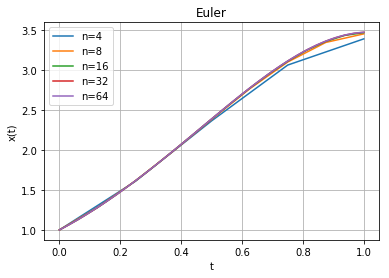

In [61]:
plt.figure()

ns = [4, 8, 16, 32, 64]
erros = []
deltas = []

# Aproximacoes de x para diferentes n's
for n in ns:
    T, x_ = ode_passo_unico(0.0, 1.0, n, f, phi_euler_modificado, 1.0)
    erros.append(math.fabs(x_[-1] - x(T[-1])))
    deltas.append(1/n)
    plt.plot(T, x_, label = 'n='+str(n))

plt.title('Euler')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.grid(True)
plt.legend()
plt.show()

No handles with labels found to put in legend.


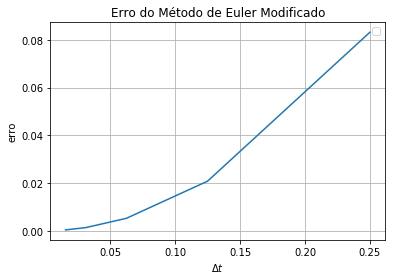

In [62]:
plt.title('Erro do Método de Euler Modificado')
plt.xlabel('$\Delta t$')
plt.ylabel('erro')

plt.grid(True)
plt.legend()
plt.plot(deltas, erros)

Vemos uma curva de $erro$ por $\Delta t$ semelhante à uma parábola no ortante positivo, como esperaríamos de um método $\mathcal{O}(\Delta t ^{2})$

Tabela de convergência:

$h = n^{-1}$

$|e(t,h)|$

$\left|\dfrac{e(t,h)}{e(t,h/2)}\right|$

$log_{2}\left|\dfrac{e(t,h)}{e(t,h/2)}\right|$

Onde $e(t, h) = x(t) - \eta(t, h)$

In [70]:
ns = [5, 10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]
eth = []
for n in ns:
    T, x_ = ode_passo_unico(0.0, 1.0, n, f, phi_euler_modificado, 1.0)
    eth.append(math.fabs(x_[-1] - x(1)))
    
razao_eth = []
for i in range(len(eth) -1):
    razao_eth.append(eth[i]/eth[i+1])
    
log_razao = [math.log(re, 2) for re in razao_eth]

In [72]:
eth

[0.053208122449349915,
 0.013288025760574751,
 0.0033211265312846905,
 0.0008302265672801568,
 0.00020755319911103243,
 5.1888084587226047e-05,
 1.2972007708889066e-05,
 3.2430011067674513e-06,
 8.107501781040583e-07,
 2.026874557081726e-07,
 5.067204833508754e-08,
 1.2668327276088576e-08]

In [73]:
razao_eth

[4.0042157810392816,
 4.001059771557282,
 4.000265303680639,
 4.000066348464326,
 4.000016588820634,
 4.0000041436661915,
 4.000001011969824,
 4.000000486402876,
 4.000001752803925,
 3.999985443016381,
 3.9999004786315284]

In [74]:
log_razao

[2.001519720888999,
 2.0003821811666853,
 2.000095684902937,
 2.0000239299516496,
 2.000005983139909,
 2.0000014945108924,
 2.0000003649909157,
 2.000000175432744,
 2.000000632190244,
 1.9999947496684272,
 1.9999641048072667]

In [87]:
[s - 2 for s in log_razao]

[0.0015197208889992098,
 0.00038218116668531366,
 9.568490293698773e-05,
 2.392995164957057e-05,
 5.983139908849466e-06,
 1.4945108923747341e-06,
 3.6499091571329245e-07,
 1.7543274388742702e-07,
 6.321902441541738e-07,
 -5.2503315728369415e-06,
 -3.589519273328179e-05]